##Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np

##Visulizando o dataset

In [ ]:
df = pd.read_excel('/content/base_dados_monografia.xlsx')
df

,data,IPCA,Brasília,Campo Grande,Cuiabá,Goiânia,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória,...,Aracaju,Fortaleza,João Pessoa,Maceió,Natal,Recife,Salvador,São Luís,Teresina,Macaé
0,2012-01-01,0.56,259.59,NaN,NaN,250.82,268.07,271.71,285.54,271.16,...,187.88,218.06,212.18,NaN,213.63,223.16,214.21,NaN,NaN,NaN
1,2012-02-01,0.45,255.91,NaN,NaN,251.04,264.28,263.46,276.54,267.19,...,188.59,214.23,212.64,NaN,218.21,219.42,204.53,NaN,NaN,NaN
2,2012-03-01,0.21,253.70,NaN,NaN,234.14,260.93,256.74,273.25,260.23,...,192.41,211.39,214.54,NaN,219.00,223.10,211.90,NaN,NaN,NaN
3,2012-04-01,0.64,255.50,NaN,NaN,235.36,258.78,252.04,277.27,262.14,...,192.52,218.87,216.95,NaN,225.41,223.97,217.92,NaN,NaN,NaN
4,2012-05-01,0.36,253.21,NaN,NaN,246.39,264.95,260.49,283.69,271.16,...,199.26,234.00,225.94,NaN,232.82,239.92,228.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2022-08-01,-0.36,689.31,698.31,NaN,660.83,638.19,717.82,749.78,697.39,...,539.57,626.98,568.21,NaN,580.74,598.14,576.93,NaN,NaN,NaN
128,2022-09-01,-0.29,687.21,711.09,NaN,658.70,650.16,714.14,750.74,686.26,...,518.68,620.87,562.32,NaN,581.53,580.01,560.31,NaN,NaN,NaN
129,2022-10-01,0.59,699.09,733.65,NaN,675.79,662.37,736.28,762.20,707.78,...,515.51,622.57,559.57,NaN,573.40,558.40,562.59,NaN,NaN,NaN
130,2022-11-01,0.41,712.20,738.53,NaN,689.49,693.37,749.25,782.68,713.57,...,511.97,630.67,552.43,NaN,566.95,551.30,550.67,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data            132 non-null    datetime64[ns]
 1   IPCA            132 non-null    float64       
 2   Brasília        131 non-null    float64       
 3   Campo Grande    123 non-null    float64       
 4   Cuiabá          33 non-null     float64       
 5   Goiânia         132 non-null    float64       
 6   Belo Horizonte  131 non-null    float64       
 7   Rio de Janeiro  132 non-null    float64       
 8   São Paulo       132 non-null    float64       
 9   Vitória         132 non-null    float64       
 10  Curitiba        132 non-null    float64       
 11  Florianópolis   132 non-null    float64       
 12  Porto Alegre    132 non-null    float64       
 13  Belém           132 non-null    float64       
 14  Boa Vista       21 non-null     float64       
 15  Macapá

In [ ]:
df.isnull().sum()

data                0
IPCA                0
Brasília            1
Campo Grande        9
Cuiabá             99
Goiânia             0
Belo Horizonte      1
Rio de Janeiro      0
São Paulo           0
Vitória             0
Curitiba            0
Florianópolis       0
Porto Alegre        0
Belém               0
Boa Vista         111
Macapá            111
Manaus             52
Palmas            112
Porto Velho       111
Rio Branco        112
Aracaju             0
Fortaleza           0
João Pessoa         0
Maceió            107
Natal               0
Recife              0
Salvador            0
São Luís           91
Teresina          112
Macaé              62
dtype: int64

##Tratamento dos dados

In [ ]:
# Definindo um limite para a quantidade máxima de valores ausentes permitidos
limite_ausentes = len(df) * 0.6  # Por exemplo, limite de 60% de valores ausentes

# Identificando as colunas com quantidade acima do limite de valores ausentes
colunas_com_muitos_ausentes = df.columns[df.isnull().sum() > limite_ausentes]

# Removendo essas colunas do DataFrame
df = df.drop(colunas_com_muitos_ausentes, axis=1)

In [ ]:
df.isnull().sum()

data               0
IPCA               0
Brasília           1
Campo Grande       9
Goiânia            0
Belo Horizonte     1
Rio de Janeiro     0
São Paulo          0
Vitória            0
Curitiba           0
Florianópolis      0
Porto Alegre       0
Belém              0
Manaus            52
Aracaju            0
Fortaleza          0
João Pessoa        0
Natal              0
Recife             0
Salvador           0
Macaé             62
dtype: int64

In [ ]:
import re

# Tratar valores nulos ainda restantes, por exemplo, preenchendo com NaT (Not a Time)
df['data'].fillna(pd.NaT, inplace=True)

# Converter para datetime
df['data'] = pd.to_datetime(df['data'], format='%m-%Y', errors='coerce')

# Exiba as primeiras linhas para verificar as mudanças
print(df.head())


        data  IPCA  Brasília  Campo Grande  Goiânia  Belo Horizonte  \
0 2012-01-01  0.56    259.59           NaN   250.82          268.07   
1 2012-02-01  0.45    255.91           NaN   251.04          264.28   
2 2012-03-01  0.21    253.70           NaN   234.14          260.93   
3 2012-04-01  0.64    255.50           NaN   235.36          258.78   
4 2012-05-01  0.36    253.21           NaN   246.39          264.95   

   Rio de Janeiro  São Paulo  Vitória  Curitiba  ...  Porto Alegre   Belém  \
0          271.71     285.54   271.16    256.52  ...        274.63  248.77   
1          263.46     276.54   267.19    246.15  ...        269.61  248.84   
2          256.74     273.25   260.23    246.11  ...        264.19  245.07   
3          252.04     277.27   262.14    249.36  ...        268.10  248.41   
4          260.49     283.69   271.16    255.32  ...        272.45  250.61   

   Manaus  Aracaju  Fortaleza  João Pessoa   Natal  Recife  Salvador  Macaé  
0  258.52   187.88     218

In [ ]:
# Identificando as colunas restantes
colunas_restantes = df.columns

# Preenchendo os valores ausentes nas colunas restantes com a média
for coluna in colunas_restantes:
    df[coluna].fillna(df[coluna].mean(), inplace=True)


In [ ]:
df.isnull().sum()

data              0
IPCA              0
Brasília          0
Campo Grande      0
Goiânia           0
Belo Horizonte    0
Rio de Janeiro    0
São Paulo         0
Vitória           0
Curitiba          0
Florianópolis     0
Porto Alegre      0
Belém             0
Manaus            0
Aracaju           0
Fortaleza         0
João Pessoa       0
Natal             0
Recife            0
Salvador          0
Macaé             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data            132 non-null    datetime64[ns]
 1   IPCA            132 non-null    float64       
 2   Brasília        132 non-null    float64       
 3   Campo Grande    132 non-null    float64       
 4   Goiânia         132 non-null    float64       
 5   Belo Horizonte  132 non-null    float64       
 6   Rio de Janeiro  132 non-null    float64       
 7   São Paulo       132 non-null    float64       
 8   Vitória         132 non-null    float64       
 9   Curitiba        132 non-null    float64       
 10  Florianópolis   132 non-null    float64       
 11  Porto Alegre    132 non-null    float64       
 12  Belém           132 non-null    float64       
 13  Manaus          132 non-null    float64       
 14  Aracaju         132 non-null    float64       
 15  Fortal

In [ ]:
!pip install unidecode

In [ ]:
from unidecode import unidecode  # Importa a função unidecode

def remove_accents_and_special_characters(text):
    # Remove acentos e converte caracteres especiais
    return re.sub(r'[^a-zA-Z0-9\s]', ' ', unidecode(str(text)))

# Renomeia as colunas removendo acentos e caracteres especiais
df.columns = [remove_accents_and_special_characters(column) for column in df.columns]

# Exibe DataFrame resultante
print(df)


          data  IPCA  Brasilia  Campo Grande  Goiania  Belo Horizonte  \
0   2012-01-01  0.56    259.59    432.517886   250.82          268.07   
1   2012-02-01  0.45    255.91    432.517886   251.04          264.28   
2   2012-03-01  0.21    253.70    432.517886   234.14          260.93   
3   2012-04-01  0.64    255.50    432.517886   235.36          258.78   
4   2012-05-01  0.36    253.21    432.517886   246.39          264.95   
..         ...   ...       ...           ...      ...             ...   
127 2022-08-01 -0.36    689.31    698.310000   660.83          638.19   
128 2022-09-01 -0.29    687.21    711.090000   658.70          650.16   
129 2022-10-01  0.59    699.09    733.650000   675.79          662.37   
130 2022-11-01  0.41    712.20    738.530000   689.49          693.37   
131 2022-12-01  0.62    728.78    744.210000   704.63          696.32   

     Rio de Janeiro  Sao Paulo  Vitoria  Curitiba  ...  Porto Alegre   Belem  \
0            271.71     285.54   271.16    

In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df

,data,IPCA,Brasilia,Campo_Grande,Goiania,Belo_Horizonte,Rio_de_Janeiro,Sao_Paulo,Vitoria,Curitiba,...,Porto_Alegre,Belem,Manaus,Aracaju,Fortaleza,Joao_Pessoa,Natal,Recife,Salvador,Macae
0,2012-01-01,0.56,259.59,432.517886,250.82,268.07,271.71,285.54,271.16,256.52,...,274.63,248.77,258.520000,187.88,218.06,212.18,213.63,223.16,214.21,330.12
1,2012-02-01,0.45,255.91,432.517886,251.04,264.28,263.46,276.54,267.19,246.15,...,269.61,248.84,252.930000,188.59,214.23,212.64,218.21,219.42,204.53,330.12
2,2012-03-01,0.21,253.70,432.517886,234.14,260.93,256.74,273.25,260.23,246.11,...,264.19,245.07,257.410000,192.41,211.39,214.54,219.00,223.10,211.90,330.12
3,2012-04-01,0.64,255.50,432.517886,235.36,258.78,252.04,277.27,262.14,249.36,...,268.10,248.41,267.190000,192.52,218.87,216.95,225.41,223.97,217.92,330.12
4,2012-05-01,0.36,253.21,432.517886,246.39,264.95,260.49,283.69,271.16,255.32,...,272.45,250.61,272.860000,199.26,234.00,225.94,232.82,239.92,228.25,330.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2022-08-01,-0.36,689.31,698.310000,660.83,638.19,717.82,749.78,697.39,685.69,...,748.06,634.85,336.830875,539.57,626.98,568.21,580.74,598.14,576.93,330.12
128,2022-09-01,-0.29,687.21,711.090000,658.70,650.16,714.14,750.74,686.26,678.73,...,743.94,622.46,336.830875,518.68,620.87,562.32,581.53,580.01,560.31,330.12
129,2022-10-01,0.59,699.09,733.650000,675.79,662.37,736.28,762.20,707.78,696.31,...,768.82,615.22,336.830875,515.51,622.57,559.57,573.40,558.40,562.59,330.12
130,2022-11-01,0.41,712.20,738.530000,689.49,693.37,749.25,782.68,713.57,709.84,...,781.52,624.29,336.830875,511.97,630.67,552.43,566.95,551.30,550.67,330.12


##Criando um novo df com a série deflacionada

In [ ]:
#adiconando coluna 'preco_medio"
colunas_numericas = df.columns.difference(['mes/ano'])
df['preco_medio'] = df[colunas_numericas].mean(axis=1)
df['preco_medio'] = df['preco_medio'].round(2)
df

<ipython-input-14-7b8960e94a48>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df['preco_medio'] = df[colunas_numericas].mean(axis=1)


,data,IPCA,Brasilia,Campo_Grande,Goiania,Belo_Horizonte,Rio_de_Janeiro,Sao_Paulo,Vitoria,Curitiba,...,Belem,Manaus,Aracaju,Fortaleza,Joao_Pessoa,Natal,Recife,Salvador,Macae,preco_medio
0,2012-01-01,0.56,259.59,432.517886,250.82,268.07,271.71,285.54,271.16,256.52,...,248.77,258.520000,187.88,218.06,212.18,213.63,223.16,214.21,330.12,247.46
1,2012-02-01,0.45,255.91,432.517886,251.04,264.28,263.46,276.54,267.19,246.15,...,248.84,252.930000,188.59,214.23,212.64,218.21,219.42,204.53,330.12,243.63
2,2012-03-01,0.21,253.70,432.517886,234.14,260.93,256.74,273.25,260.23,246.11,...,245.07,257.410000,192.41,211.39,214.54,219.00,223.10,211.90,330.12,242.12
3,2012-04-01,0.64,255.50,432.517886,235.36,258.78,252.04,277.27,262.14,249.36,...,248.41,267.190000,192.52,218.87,216.95,225.41,223.97,217.92,330.12,244.55
4,2012-05-01,0.36,253.21,432.517886,246.39,264.95,260.49,283.69,271.16,255.32,...,250.61,272.860000,199.26,234.00,225.94,232.82,239.92,228.25,330.12,250.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2022-08-01,-0.36,689.31,698.310000,660.83,638.19,717.82,749.78,697.39,685.69,...,634.85,336.830875,539.57,626.98,568.21,580.74,598.14,576.93,330.12,591.18
128,2022-09-01,-0.29,687.21,711.090000,658.70,650.16,714.14,750.74,686.26,678.73,...,622.46,336.830875,518.68,620.87,562.32,581.53,580.01,560.31,330.12,587.02
129,2022-10-01,0.59,699.09,733.650000,675.79,662.37,736.28,762.20,707.78,696.31,...,615.22,336.830875,515.51,622.57,559.57,573.40,558.40,562.59,330.12,593.55
130,2022-11-01,0.41,712.20,738.530000,689.49,693.37,749.25,782.68,713.57,709.84,...,624.29,336.830875,511.97,630.67,552.43,566.95,551.30,550.67,330.12,600.11


In [ ]:
df.set_index('data', inplace=True)

# Função para deflacionar os valores com base na coluna IPCA
def deflacionar_coluna(coluna):
    return coluna / (1 + df['IPCA'] / 100)

# Criando um novo DataFrame deflacionado
df_deflacionado = pd.DataFrame(index=df.index)

# Iterando sobre as colunas e deflacionando os valores
for coluna in df.columns:
    if coluna != 'IPCA':  # Ignorando a coluna IPCA
        df_deflacionado[coluna] = deflacionar_coluna(df[coluna]).round(2)

# Exibindo o DataFrame deflacionado
print(df_deflacionado)

            Brasilia  Campo_Grande  Goiania  Belo_Horizonte  Rio_de_Janeiro  \
data                                                                          
2012-01-01    258.14        430.11   249.42          266.58          270.20   
2012-02-01    254.76        430.58   249.92          263.10          262.28   
2012-03-01    253.17        431.61   233.65          260.38          256.20   
2012-04-01    253.88        429.77   233.86          257.13          250.44   
2012-05-01    252.30        430.97   245.51          264.00          259.56   
...              ...           ...      ...             ...             ...   
2022-08-01    691.80        700.83   663.22          640.50          720.41   
2022-09-01    689.21        713.16   660.62          652.05          716.22   
2022-10-01    694.99        729.35   671.83          658.48          731.96   
2022-11-01    709.29        735.51   686.67          690.54          746.19   
2022-12-01    724.29        739.62   700.29         

In [ ]:
print(df_deflacionado.describe())

         Brasilia  Campo_Grande     Goiania  Belo_Horizonte  Rio_de_Janeiro  \
count  132.000000    132.000000  132.000000      132.000000      132.000000   
mean   427.637879    430.379545  400.782273      410.893030      452.138258   
std    125.984086    124.215028  124.839609      113.080596      134.229678   
min    252.300000    262.670000  233.650000      257.130000      250.440000   
25%    326.027500    343.217500  295.130000      322.675000      342.042500   
50%    415.260000    404.235000  379.385000      383.690000      438.695000   
75%    471.710000    473.885000  459.685000      458.710000      511.797500   
max    733.770000    753.740000  700.290000      692.030000      760.360000   

        Sao_Paulo     Vitoria    Curitiba  Florianopolis  Porto_Alegre  \
count  132.000000  132.000000  132.000000     132.000000    132.000000   
mean   466.534015  440.232576  422.680833     455.904697    459.670606   
std    136.995453  125.599044  126.172132     140.440149    135.49

In [ ]:
df_deflacionado.reset_index(inplace=True)

In [ ]:
colunas_a_manter = ['data', 'preco_medio']

# Manter apenas as colunas desejadas
df_deflacionado = df_deflacionado[colunas_a_manter]

In [ ]:
df_deflacionado.to_excel('C:\\Users\\Dell\\Documents\\monografia\\dados.xlsx', index=False)

## Criando visualizações

Text(0, 0.5, 'R$')

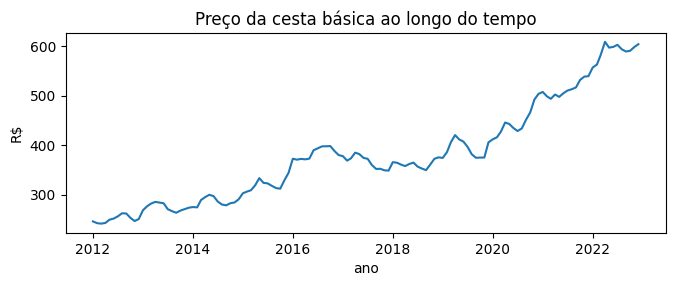

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# plotando a variação de preço médio da cesta ao longo dos anos
fig = plt.figure(figsize = (6,2))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df_deflacionado['data'], df_deflacionado['preco_medio'], linestyle='-')

plt.title('Preço da cesta básica ao longo do tempo')
plt.xlabel('ano')
plt.ylabel('R$')

<ipython-input-21-d99a8c5f27b9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_deflacionado['preco_medio'],


Text(0.5, 1.0, 'Distribuição dos PREÇOS')

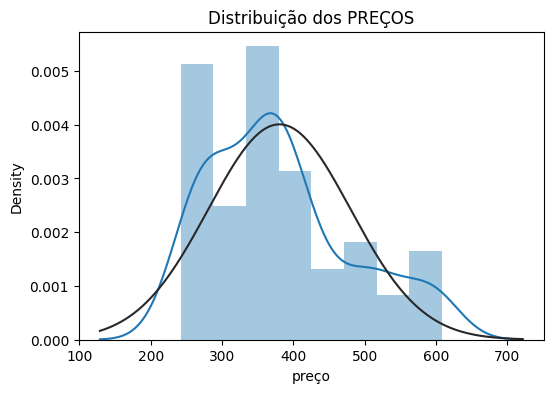

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.distplot(df_deflacionado['preco_medio'],
                  fit=norm,
                  kde=True)
ax.set_xlabel('preço')
ax.set_title('Distribuição dos PREÇOS')

##EDA para ARIMA

###Decomposição da série temporal

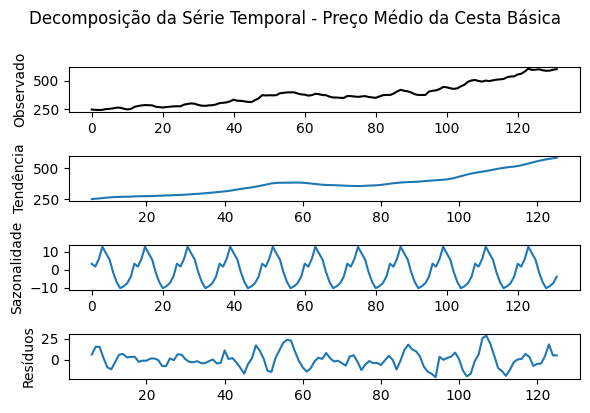

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Fazendo a decomposição sazonal da série temporal
decomposicao_serie = seasonal_decompose(df_deflacionado['preco_medio'], model='additive', period=12)

# Plotando os componentes: tendência, sazonalidade e resíduos
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(6, 4))

ax1.plot(df_deflacionado['preco_medio'], label='Observado', color='black')
ax1.set_ylabel('Observado')

ax2.plot(decomposicao_serie.trend, label='Tendência')
ax2.set_ylabel('Tendência')

ax3.plot(decomposicao_serie.seasonal, label='Sazonalidade')
ax3.set_ylabel('Sazonalidade')

ax4.plot(decomposicao_serie.resid, label='Resíduos')
ax4.set_ylabel('Resíduos')

# Adicionando títulos e ajustando layout
fig.suptitle('Decomposição da Série Temporal - Preço Médio da Cesta Básica', y=1.02)
fig.tight_layout()
plt.show()


###Teste de Estacionariedade

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Rodando o teste de Dickey-Fuller
adfuller_preco_medio = adfuller(df_deflacionado['preco_medio'])
print('ADF Statistics PREÇO MÉDIO:', adfuller_preco_medio[0])
print('p-value PREÇO MÉDIO:', adfuller_preco_medio[1])
print(f'Critical Values: {adfuller_preco_medio[4]}')

if adfuller_preco_medio[1] <= 0.05:
    print("A série é estacionária")
else:
    print("A série não é estacionária.")


ADF Statistics PREÇO MÉDIO: 0.2614927488808196
p-value PREÇO MÉDIO: 0.975507158054102
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
A série não é estacionária.


<ipython-input-24-c6c5e3052e26>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(df_arima['preco_medio'],


Text(0.5, 1.0, 'Distribuição dos valores após a 1º Diferenciação')

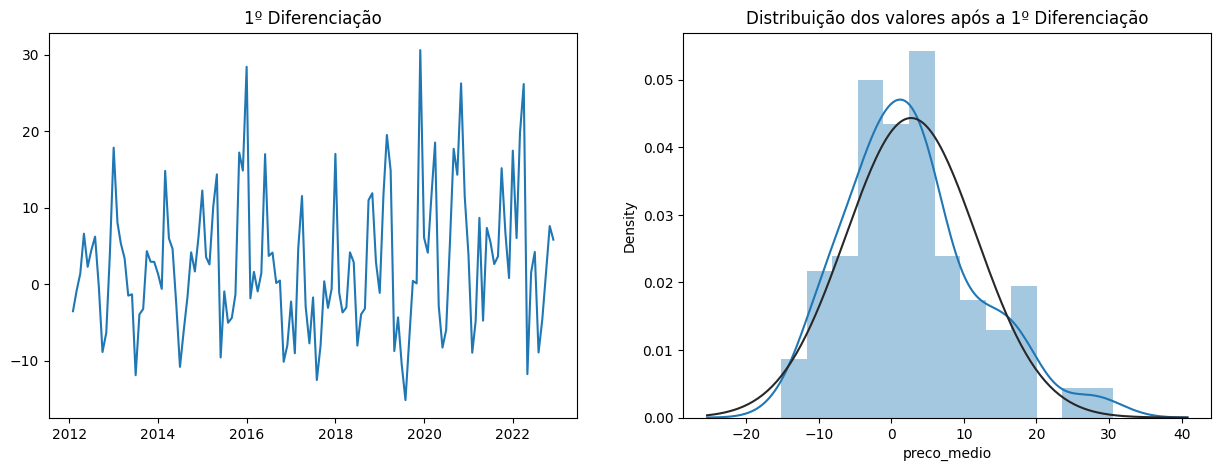

In [ ]:
#Aplicando técnica de diferenciação para tornar a série estacionária
#A diferenciação é usada para remover os sinais de tendências e reduzir a variação,
#ela simplesmente é a diferença do valor do período T com o valor do período anterior T-1 .

df_arima = df_deflacionado.copy()
df_arima['preco_medio'] = df_arima['preco_medio'].diff()

df_arima.set_index('data', inplace=True)
df_arima.dropna(inplace=True)

fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(df_arima['preco_medio'])
axs[0].set_title('1º Diferenciação')
ax2 = sns.distplot(df_arima['preco_medio'],
                            fit=norm,
                            kde=True,
                            ax=axs[1])
ax2.set_title('Distribuição dos valores após a 1º Diferenciação')

In [ ]:
# Teste de Dickey-Fuller após a diferenciação
result_diff = adfuller(df_arima['preco_medio'])
print(f'ADF Statistic: {result_diff[0]}')
print(f'p-value: {result_diff[1]}')
print(f'Critical Values: {result_diff[4]}')

# Verificando se a série é estacionária após a diferenciação
if result_diff[1] <= 0.05:
    print("A série é estacionária após a 1ª diferenciação.")
else:
    print("A série ainda não é estacionária após a 1ª diferenciação.")

ADF Statistic: -7.7689262658287275
p-value: 9.029995008813489e-12
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
A série é estacionária após a 1ª diferenciação.


###Identificação do Modelo


####PACF — Função de Autocorrelação Parcial (p)

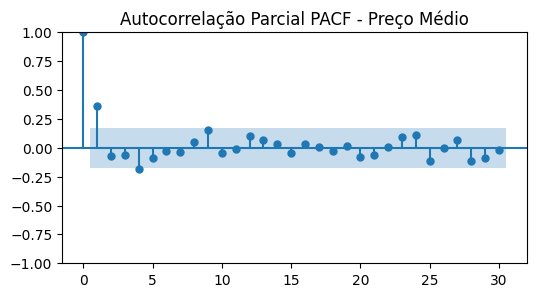

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(6, 3))
plot_pacf(df_arima['preco_medio'].dropna(), lags = 30, ax=ax)
ax.set_title('Autocorrelação Parcial PACF - Preço Médio')
plt.show()

####ACF — Função de Autocorrelação (q)


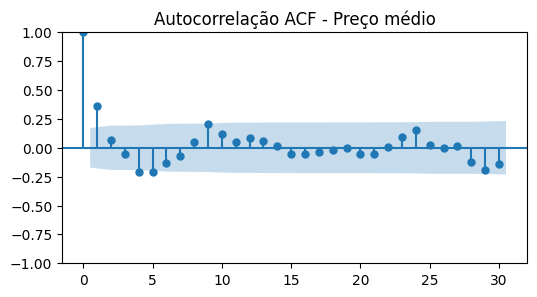

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(6, 3))
plot_acf(df_arima['preco_medio'].dropna(), lags = 30, ax=ax)
ax.set_title('Autocorrelação ACF - Preço médio')
plt.show()

## Modelo ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

y = df_arima['preco_medio']
modelo_arima = ARIMA(y, order=(1, 1, 1))
modelo_arima_fit = modelo_arima.fit()
print(modelo_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            preco_medio   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -463.585
Date:                Mon, 08 Jan 2024   AIC                            933.170
Time:                        19:02:51   BIC                            941.773
Sample:                    02-01-2012   HQIC                           936.666
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3695      0.092      4.011      0.000       0.189       0.550
ma.L1         -0.9987      0.317     -3.146      0.002      -1.621      -0.377
sigma2        71.0744     23.561      3.017      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


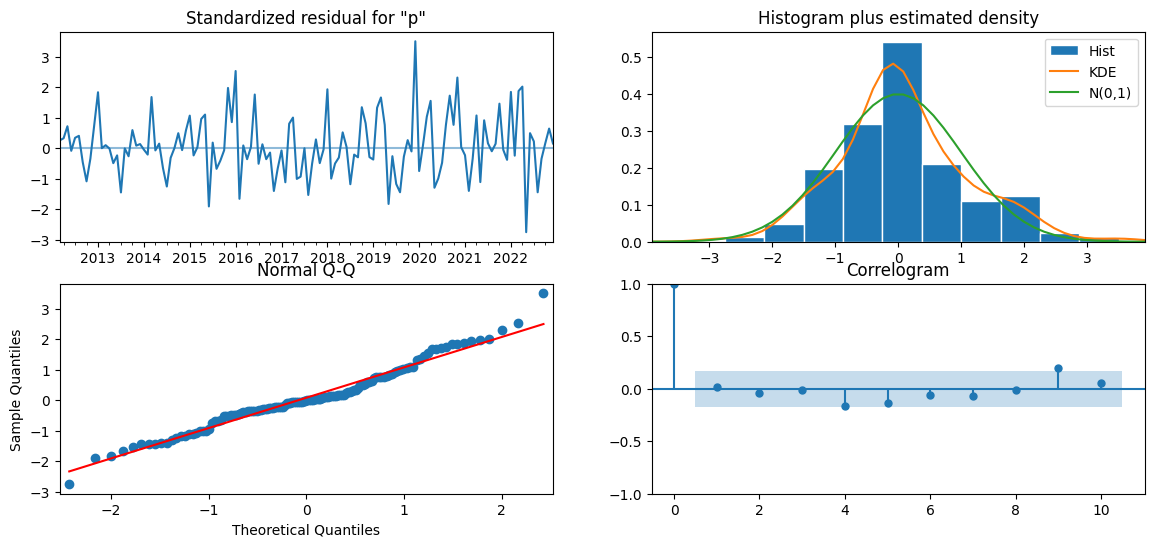

In [ ]:
modelo_arima_fit.plot_diagnostics(figsize=(14,6))
plt.show()

In [ ]:
import itertools
import statsmodels.api as sm

p = d = q = range(0, 5)
pdq = list(itertools.product(p, d, q))

aic_lista = []

# Substitua 'y' pelo seu próprio conjunto de dados
# Certifique-se de ter um conjunto de dados de exemplo para ajustar o modelo ARIMA
# y = ...

for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(y,
                                    order=param,
                                    )
    results = mod.fit()
    aic_lista.append('ARIMA{}x{}x{} - AIC{}'.format(param[0], param[1], param[2], results.aic))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [ ]:
if aic_lista:
    melhor_combinacao = min(aic_lista, key=lambda x: float(x.split('- AIC')[1]))

    print("Melhor combinação:", melhor_combinacao)
else:
    print("A lista aic_lista está vazia.")


Melhor combinação: ARIMA1x1x1 - AIC933.1704483256284


In [ ]:
y = df_arima['preco_medio']
modelo_arima = ARIMA(y, order=(1, 1, 1))
modelo_arima_fit = modelo_arima.fit()
print(modelo_arima_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            preco_medio   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -463.585
Date:                Mon, 08 Jan 2024   AIC                            933.170
Time:                        19:04:52   BIC                            941.773
Sample:                    02-01-2012   HQIC                           936.666
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3695      0.092      4.011      0.000       0.189       0.550
ma.L1         -0.9987      0.317     -3.146      0.002      -1.621      -0.377
sigma2        71.0744     23.561      3.017      0.0

## SARIMA (ARIMA sazonal)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Especificando a ordem do modelo SARIMA
order = (1, 0, 0)  # (p, d, q)
seasonal_order = (0, 2, 2, 12)  # (P, D, Q, s)

# Criando e ajustando o modelo SARIMA
mod = SARIMAX(y, order=order, seasonal_order=seasonal_order)
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                        SARIMAX Results                                        
Dep. Variable:                             preco_medio   No. Observations:                  131
Model:             SARIMAX(1, 0, 0)x(0, 2, [1, 2], 12)   Log Likelihood                -408.539
Date:                                 Mon, 08 Jan 2024   AIC                            825.078
Time:                                         19:04:57   BIC                            835.770
Sample:                                     02-01-2012   HQIC                           829.413
                                          - 12-01-2022                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3684      0.095      3.862      0.000       0.181       0

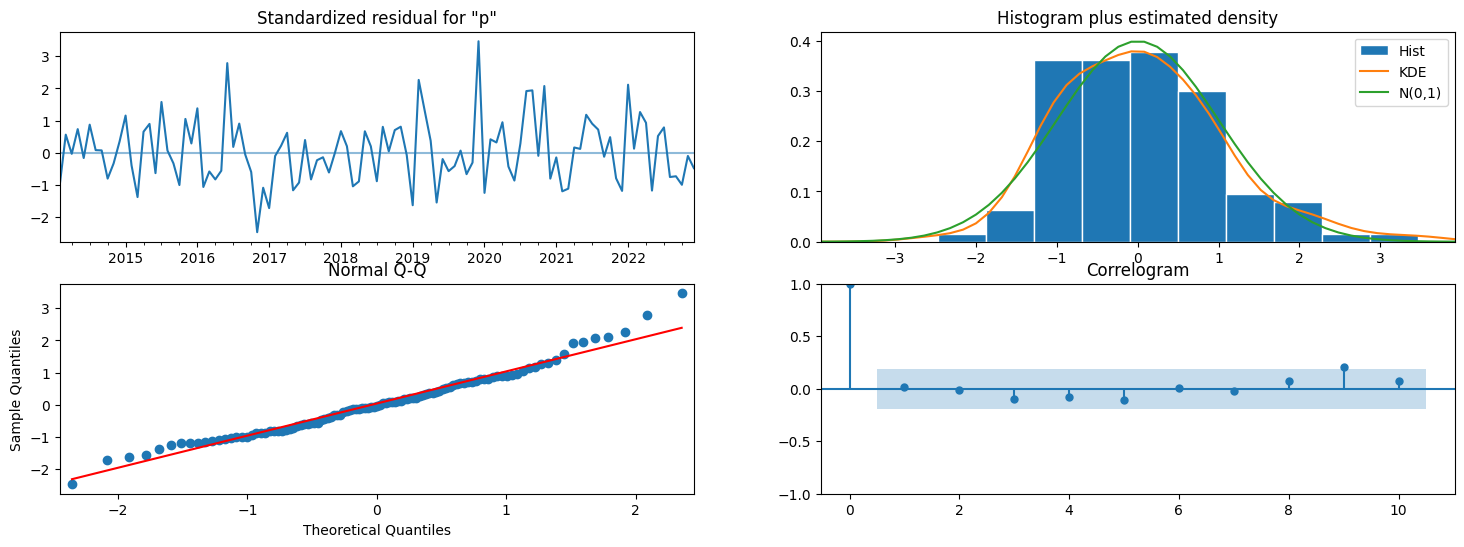

In [ ]:
# Exibindo o resumo do modelo
results.plot_diagnostics(figsize=(18,6))
plt.show()

#Previsões com o Modelo SARIMA

In [ ]:
start_date = pd.to_datetime('2022-01-01')
pred = results.get_prediction(start=start_date, dynamic=False)
pred_ic = pred.conf_int()

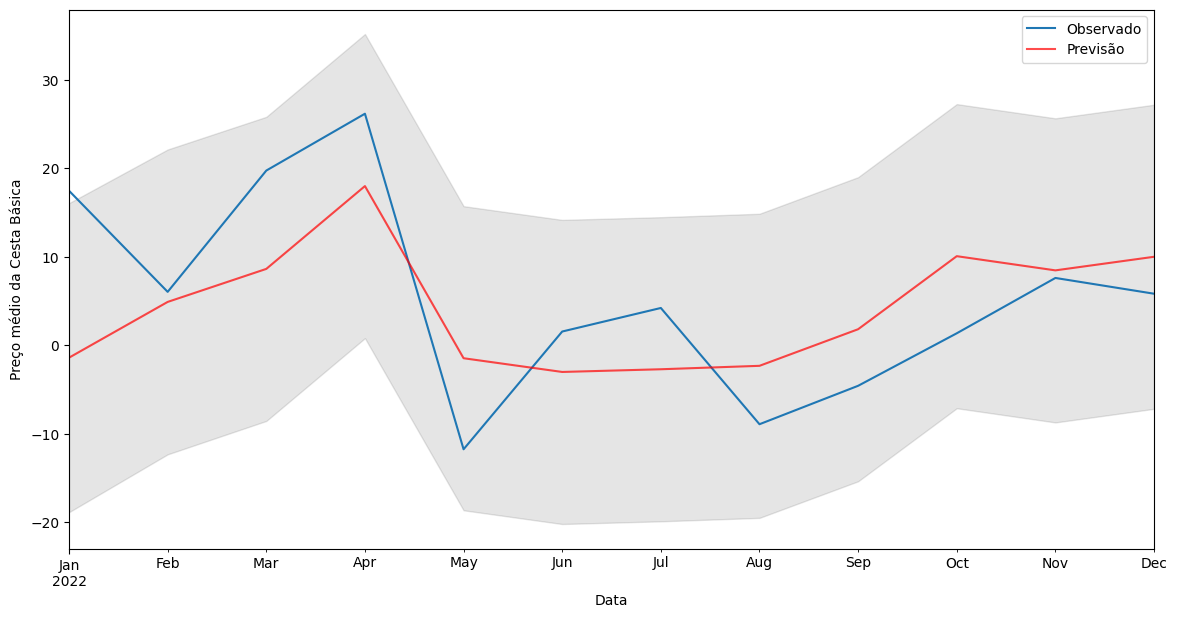

In [ ]:
ax = y['2022':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Previsão', color='r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k',alpha=0.1)
ax.set_xlabel('Data')
ax.set_ylabel('Preço médio da Cesta Básica')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
pred = pred.predicted_mean

pred, y = pred.align(y, join='inner')

mae = mean_absolute_error(y, pred)
mse = mean_squared_error(y, pred)
rmse = np.sqrt(mse)
# Exibindo os resultados
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 7.313954115065363
MSE: 74.98346681486865
RMSE: 8.65929944134447
